# Turbofan Engine Degradation Simulation
Cet ensemble de données contient des simulations de dégradation de moteurs à turbofan sous différentes conditions opérationnelles et modes de panne. Les signaux de capteurs enregistrent l'évolution des pannes.

Engine degradation simulation was carried out using the Commercial Modular Aero-Propulsion System Simulation (C-MAPSS). Four different sets were simulated under different combinations of operational conditions and fault modes. This records several sensor channels to characterize fault evolution. The data set was provided by the NASA Ames Prognostics Center of Excellence (PCoE).

- Download: https://data.nasa.gov/Aeorspace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6  
- Download Mirror: https://phm-datasets.s3.amazonaws.com/NASA/6.+Turbofan+Engine+Degradation+Simulation+Data+Set.zip
- Data Set Citation: A. Saxena and K. Goebel (2008). “Turbofan Engine Degradation Simulation Data Set”, NASA Prognostics Data Repository, NASA Ames Research Center, Moffett Field, CA

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
import cv2

In [8]:
# Définir les chemins des répertoires de données
data_dir = "Data"
rul_dir = os.path.join(data_dir, "RUL")
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Lister les fichiers dans chaque répertoire
rul_files = os.listdir(rul_dir)
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

# Fonction pour charger les données
def load_data(file_path, columns):
    return pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)

# Définir les colonnes pour les fichiers train et test
columns = [
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3',
    'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4',
    'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
    'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12',
    'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16',
    'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20',
    'sensor_measurement_21', 'sensor_measurement_22', 'sensor_measurement_23', 'sensor_measurement_24',
    'sensor_measurement_25', 'sensor_measurement_26'
]

# Exemple de chargement des données de train et test pour FD001
train_data = load_data(os.path.join(train_dir, 'train_FD001.txt'), columns)
test_data = load_data(os.path.join(test_dir, 'test_FD001.txt'), columns)

# Charger les données RUL
rul_data = pd.read_csv(os.path.join(rul_dir, 'RUL_FD001.txt'), header=None, names=['RUL'])

C:\Users\PC de MEDUSA\AppData\Local\Temp\ipykernel_30524\516493873.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
C:\Users\PC de MEDUSA\AppData\Local\Temp\ipykernel_30524\516493873.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)


In [23]:
train_data

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,397,2388,100.0,38.49,22.9735,NaN,NaN,NaN,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,395,2388,100.0,38.30,23.1594,NaN,NaN,NaN,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,398,2388,100.0,38.44,22.9333,NaN,NaN,NaN,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,395,2388,100.0,38.29,23.0640,NaN,NaN,NaN,NaN,NaN


In [32]:
train_data.groupby('unit_number').count()

,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
unit_number,,,,,,,,,,,,,,,,,,,,,
1,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,0,0,0,0,0
2,287,287,287,287,287,287,287,287,287,287,...,287,287,287,287,287,0,0,0,0,0
3,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,0,0,0,0,0
4,189,189,189,189,189,189,189,189,189,189,...,189,189,189,189,189,0,0,0,0,0
5,269,269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,336,336,336,336,336,336,336,336,336,...,336,336,336,336,336,0,0,0,0,0
97,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,0,0,0,0,0
98,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,0,0,0,0,0


In [44]:
# Fonction pour générer et enregistrer des spectrogrammes
def generate_spectrogram(signal, fs, output_path, unit_number, sensor_number):
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=256, noverlap=128)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.axis('off')
    plt.savefig(os.path.join(output_path, f'unit_{unit_number}_sensor_{sensor_number}.png'), bbox_inches='tight', pad_inches=0)
    plt.close()

In [49]:
# Fonction pour tracer un signal spécifique pour une unité donnée
def plot_signal_for_unit(data, unit_number, sensor_column, title):
    unit_data = data[data['unit_number'] == unit_number]
    #plt.figure(figsize=(10, 6))
    plt.plot(unit_data['time_in_cycles'], unit_data[sensor_column])
    plt.title(f'{title} for Unit {unit_number}')
    plt.xlabel('Time in Cycles')
    plt.ylabel(sensor_column)
    plt.show()

In [ ]:
# Sélectionner une unité spécifique (par exemple, unité 1)
unit_number = 2

# Tracer un exemple de mesure de capteur pour l'unité sélectionnée
plt.subplot(2,2,1)
plot_signal_for_unit(train_data, unit_number, 'sensor_measurement_1', 'Sensor Measurement 1 over Time')

# Tracer d'autres exemples de mesures de capteur pour l'unité sélectionnée si nécessaire
plt.subplot(2,2,2)
plot_signal_for_unit(train_data, unit_number, 'sensor_measurement_2', 'Sensor Measurement 2 over Time')
plt.subplot(2,2,3)
plot_signal_for_unit(train_data, unit_number, 'sensor_measurement_3', 'Sensor Measurement 3 over Time')

# Tracer pour une autre unité (par exemple, unité 2)
plt.subplot(2,2,4)
plot_signal_for_unit(train_data, 2, 'sensor_measurement_1', 'Sensor Measurement 1 over Time')

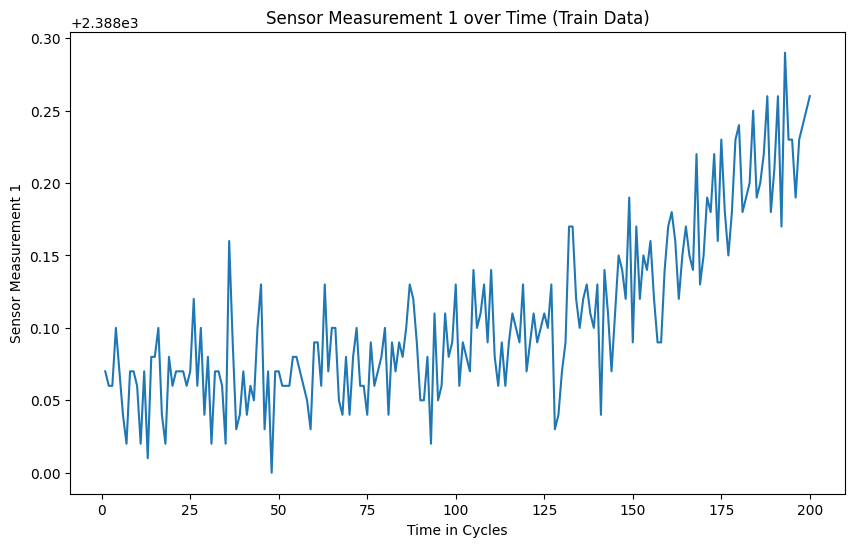

In [40]:
# Exemple de visualisation d'une mesure de capteur
plt.figure(figsize=(10, 6))
plt.plot(train_data[-200:]['time_in_cycles'], train_data[-200:]['sensor_measurement_8'])
plt.title('Sensor Measurement 1 over Time (Train Data)')
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor Measurement 1')
plt.show()

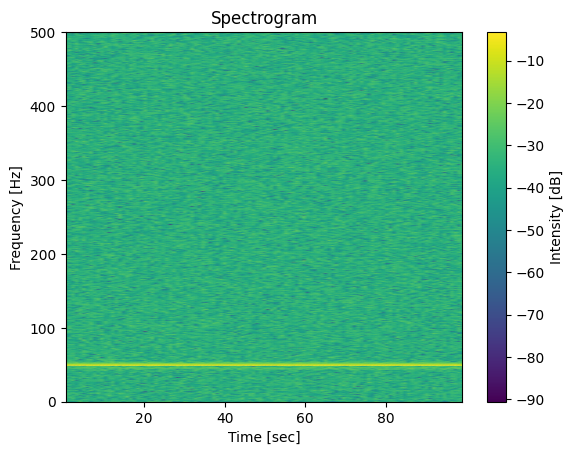

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Simuler un signal de vibration (exemple)
fs = 1000  # Fréquence d'échantillonnage
N = 1e5    # Nombre de points dans le signal
time = np.arange(N) / fs
frequency = 50  # Fréquence du signal
signal = np.sin(2 * np.pi * frequency * time)

# Ajouter du bruit
noise = 0.5 * np.random.normal(size=signal.shape)
signal += noise

# Calculer le spectrogramme
f, t, Sxx = spectrogram(signal, fs, nperseg=1024)

# Afficher le spectrogramme
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()
